# Time Prediction Using STUMPY

In [157]:
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle
import stumpy
import math

In [2]:
df = pd.read_excel('upwork_stump_dataset.xlsx')
print('dataset has {} entries'.format(len(df)))

dataset has 5383 entries


In [3]:
print(df.head(10))

        Date   Value      RMI  Label(to predict)
0 2021-02-25  0.0319  28.5075                NaN
1 2021-02-24  0.0319  30.4234                NaN
2 2021-02-23  0.0324  32.3257                NaN
3 2021-02-22  0.0325  33.7445                NaN
4 2021-02-19  0.0332  36.1516                NaN
5 2021-02-18  0.0331  38.3615          -0.036254
6 2021-02-17  0.0333  41.1716          -0.042042
7 2021-02-16  0.0339  44.2091          -0.044248
8 2021-02-12  0.0344  46.3975          -0.055233
9 2021-02-11  0.0345  47.7925          -0.037681


In [4]:
df = df.set_index('Date')

In [5]:
print(df.index)

DatetimeIndex(['2021-02-25', '2021-02-24', '2021-02-23', '2021-02-22',
               '2021-02-19', '2021-02-18', '2021-02-17', '2021-02-16',
               '2021-02-12', '2021-02-11',
               ...
               '1999-10-18', '1999-10-15', '1999-10-14', '1999-10-13',
               '1999-10-12', '1999-10-11', '1999-10-08', '1999-10-07',
               '1999-10-06', '1999-10-05'],
              dtype='datetime64[ns]', name='Date', length=5383, freq=None)


In [6]:
print(df.sample(10, random_state=0))

             Value      RMI  Label(to predict)
Date                                          
2019-03-05  0.0154  56.0098           0.032468
2006-04-03  0.0015  35.7675           0.066667
2016-09-08  0.0114  59.5855           0.114035
2005-09-30  0.0013  80.4000           0.000000
2001-07-03  0.0003  65.2178           0.000000
2019-05-10  0.0168  58.9145          -0.035714
2010-02-16  0.0057  55.4213          -0.035088
2004-09-10  0.0005  78.8502           0.000000
2004-01-27  0.0003  48.3134           0.000000
2003-01-27  0.0003  45.8297           0.000000


# Plot the data

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.set(rc={'figure.figsize':(20, 4)})

## RMI through time

<AxesSubplot:xlabel='Date'>

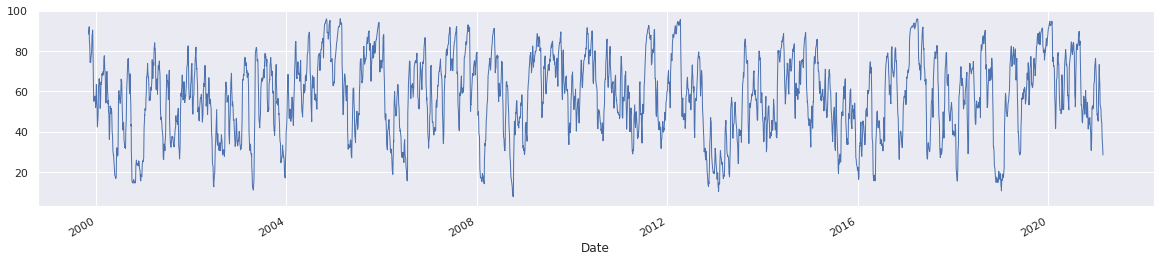

In [9]:
df['RMI'].plot(linewidth=1)

## Value through time

<AxesSubplot:xlabel='Date'>

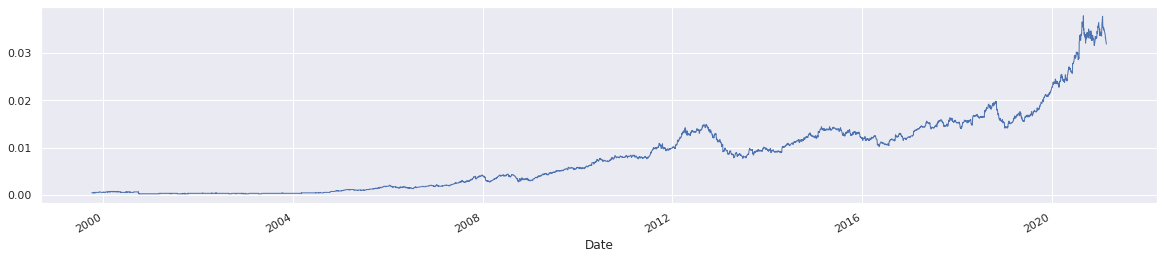

In [10]:
df['Value'].plot(linewidth=1)

## Label through time

<AxesSubplot:xlabel='Date'>

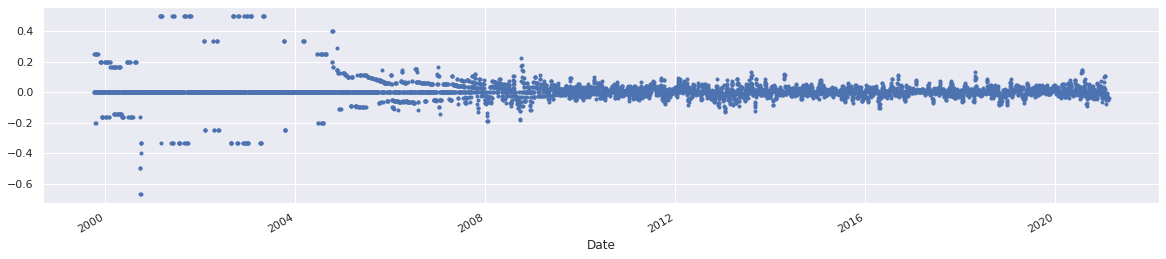

In [11]:
df['Label(to predict)'].plot(marker='.', linestyle='None')

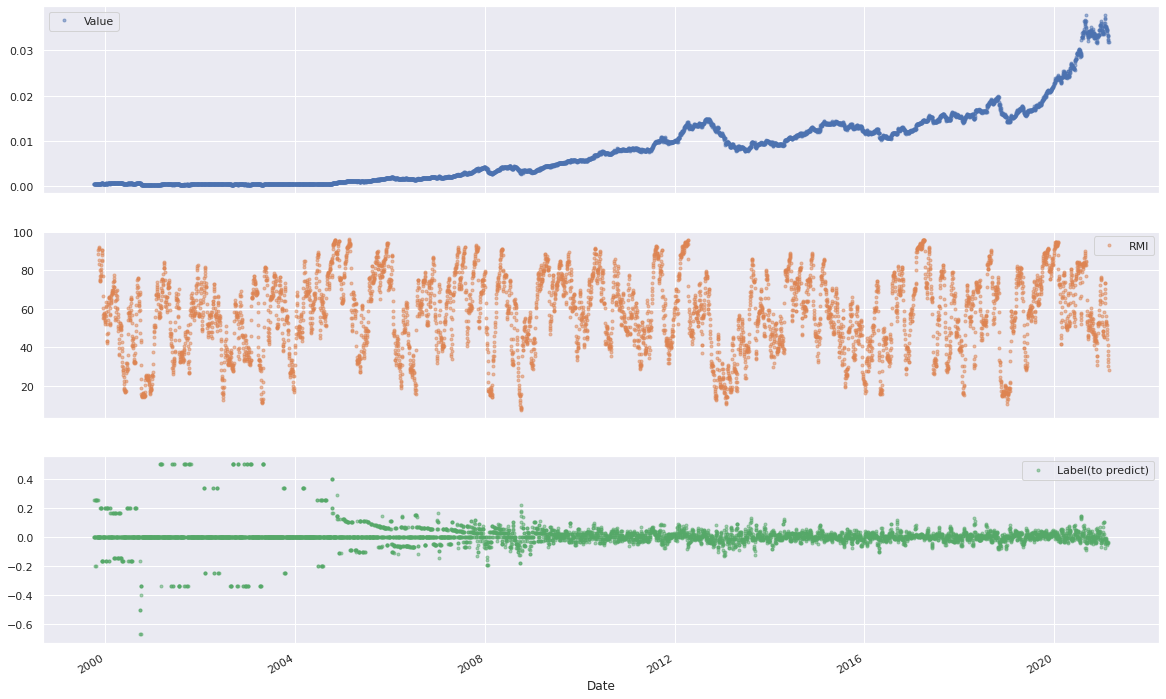

In [12]:
cols_plot = ['Value', 'RMI', 'Label(to predict)']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(20, 13), subplots=True)

# Process Flow
The goal is to identify the top k-matches for a few select subsequences.

1. Compute the matrix profile
2. From the matrix profile, identify the subset of motifs/subsequence patterns you are interested in
3. Using this set of subsequences, compute the distance profile via fast pattern searching approach.

Alternatively, manually choose a subsequence.

## Getting the Matrix Profile

In [150]:
m = 20
k = 10
mp = stumpy.stump(df['RMI'], m)

In [151]:
print(mp)

[[0.39372300797583126 3290 -1 3290]
 [0.2802530726952369 3291 -1 3291]
 [0.3114536349852958 3292 -1 3292]
 ...
 [inf -1 -1 -1]
 [inf -1 -1 -1]
 [inf -1 -1 -1]]


## Sorted Indices
The motif indices are sorted in descending order. We can obtain the top k indices from the list.

In [152]:
top_k_indices = np.argsort(mp[:,0])[0:k]
print('the top {} indices are given by {}'.format(k, top_k_indices))

the top 10 indices are given by [5218 3117 4543  424  423 4542    1 3291 2100  854]


## Nearest Neighbors
The information above can be used to obtain the corresponding nearest neighbors.

In [153]:
nearest_neighbor_indices = []

for index in top_k_indices:
    nearest_neighbor_indices.append(mp[index,1])

print('the nearest neighbors for each motif are given by: {}'.format(nearest_neighbor_indices))

the nearest neighbors for each motif are given by: [3117, 5218, 424, 4543, 4542, 423, 3291, 1, 854, 2100]


## Plotting Each Motif Pair

Double click on the figure to zoom in. Each pair corresponds to one color.

In [154]:
# map a distinct color to each pair 
cmap = plt.cm.get_cmap('rainbow', k)

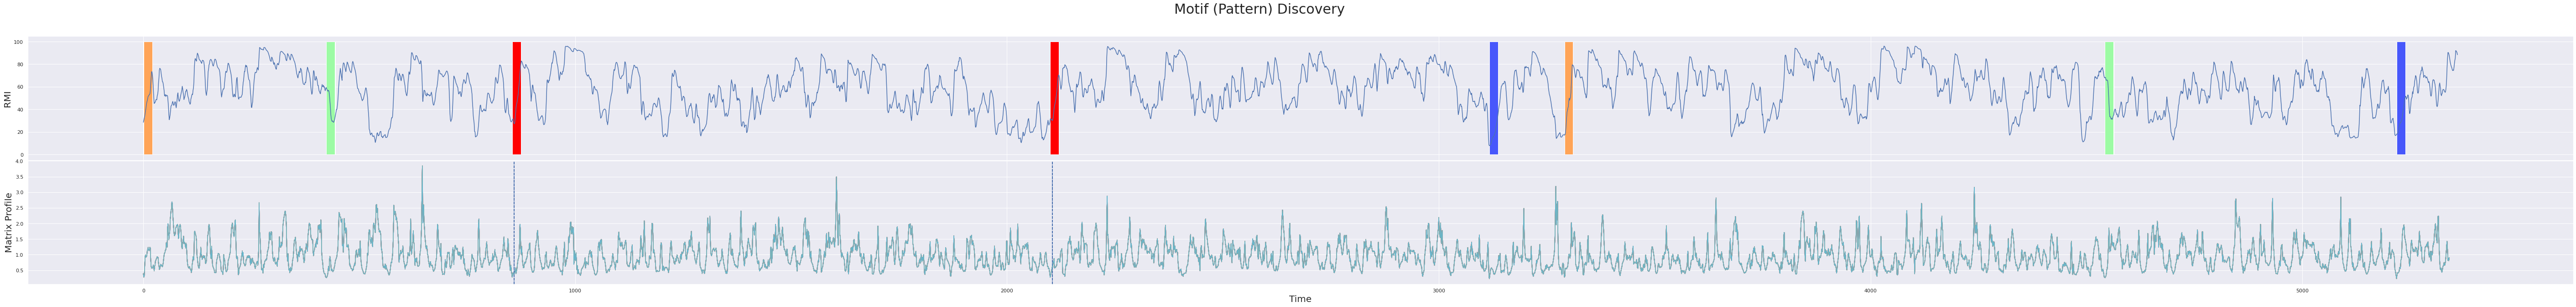

In [155]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize=(100,10))
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(df['RMI'].values)
axs[0].set_ylabel('RMI', fontsize='20')

for i in range(len(top_k_indices)):
    rect = Rectangle((top_k_indices[i], 0), m, 100, facecolor=cmap(i))
    axs[0].add_patch(rect)
    rect = Rectangle((nearest_neighbor_indices[i], 0), m, 100, facecolor=cmap(i))
    axs[0].add_patch(rect)
    axs[1].set_xlabel('Time', fontsize ='20')
    axs[1].set_ylabel('Matrix Profile', fontsize='20')
    axs[1].axvline(x=motif_idx, linestyle="dashed")
    axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
    axs[1].plot(mp[:, 0])

plt.show()

## Choosing a subsequence

Manually choose a subsequence by providing an end date. Alternatively, you may refer to the motif pairs given above.

In [228]:
# set the end date here
end_date = '2020-01-02'

In [241]:
end_date_index = df['RMI'].index.get_loc(end_date)[0]

subsequence = df['RMI'][end_date_index-m:end_date_index]
print(subsequence)

Date
2020-01-31    94.7372
2020-01-30    94.5981
2020-01-29    94.1767
2020-01-28    93.4406
2020-01-27    93.0844
2020-01-24    93.3806
2020-01-23    93.1613
2020-01-22    92.9162
2020-01-21    92.6558
2020-01-17    92.6319
2020-01-16    94.7659
2020-01-15    94.7649
2020-01-14    94.7485
2020-01-13    94.4117
2020-01-10    93.6044
2020-01-09    92.9922
2020-01-08    92.3138
2020-01-07    92.0300
2020-01-06    91.6576
2020-01-03    91.0864
Name: RMI, dtype: float64


In [226]:
"""
use this if you want to choose a subsequence based on the matrix profile

middle_index = np.argsort(mp[:,0])[math.floor(len(mp)/2)]
print('the index is given by {}'.format(middle_index))
subsequence = df['RMI'][middle_index:middle_index+m]
end_point = len(subsequence)
print(subsequence)
"""

"\nuse this if you want to choose a subsequence based on the matrix profile\n\nmiddle_index = np.argsort(mp[:,0])[math.floor(len(mp)/2)]\nprint('the index is given by {}'.format(middle_index))\nsubsequence = df['RMI'][middle_index:middle_index+m]\nend_point = len(subsequence)\nprint(subsequence)\n"

## Creating a distance profile via fast pattern searching approach

We will only take one subsequence out of all the subsequences from above.

In [242]:
distance_profile = stumpy.core.mass(subsequence, df['RMI'])
print(distance_profile)

[8.02542472 8.12797108 8.1591027  ...        inf        inf        inf]


In [243]:
idx = np.argsort(distance_profile)

print(f"The nearest neighbors to the subsequence is located at the following indices {idx} in the time series")

The nearest neighbors to the subsequence is located at the following indices [ 269  155 3003 ... 5362 5351 5363] in the time series


## Compare the subsequence to the top k nearest neighbors

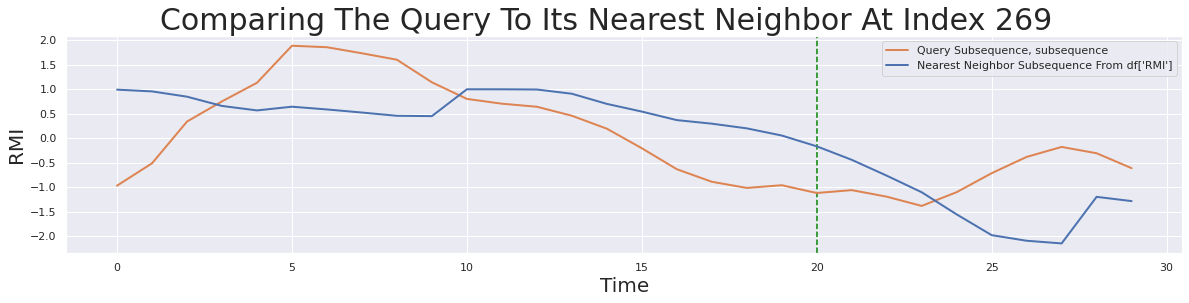

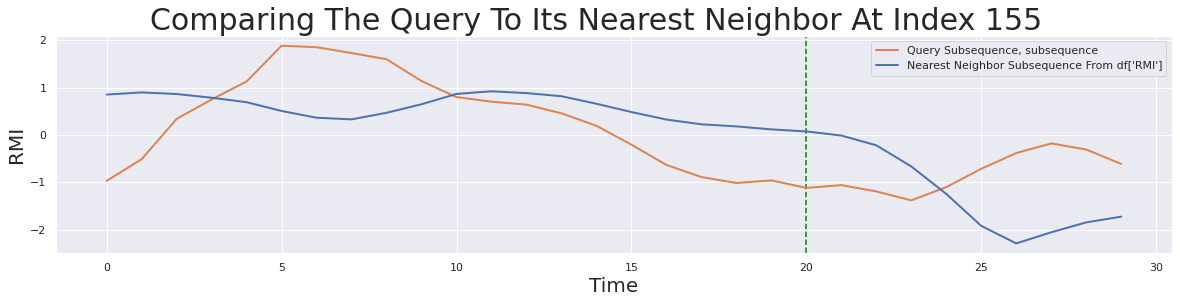

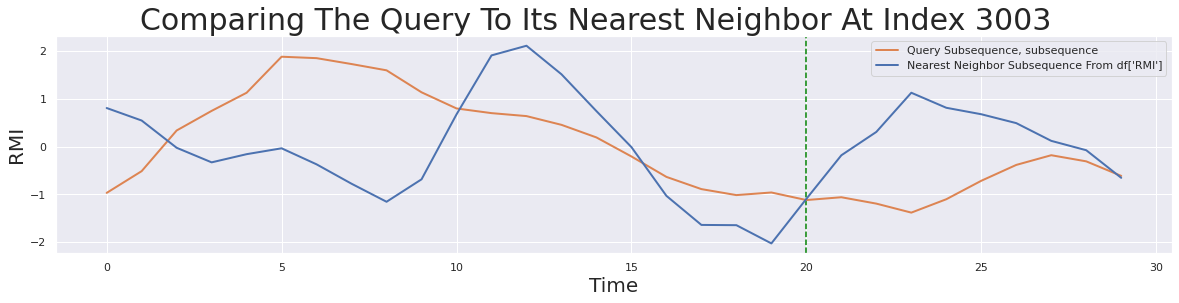

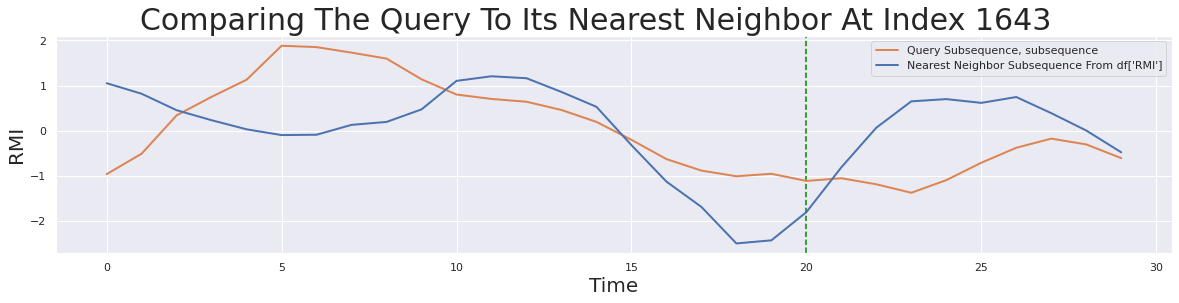

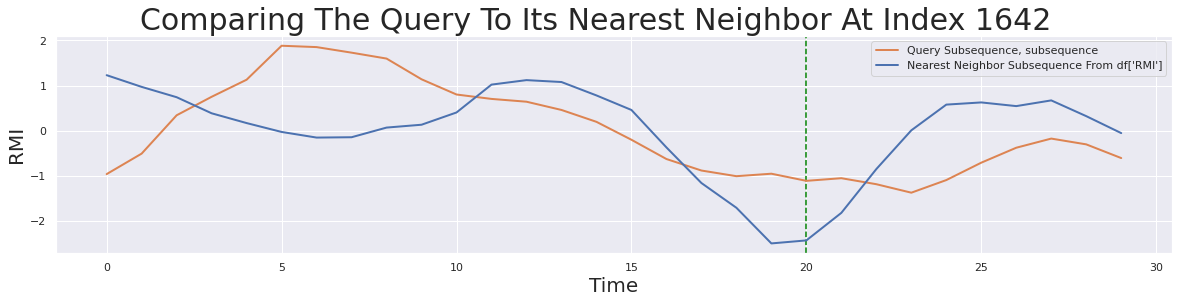

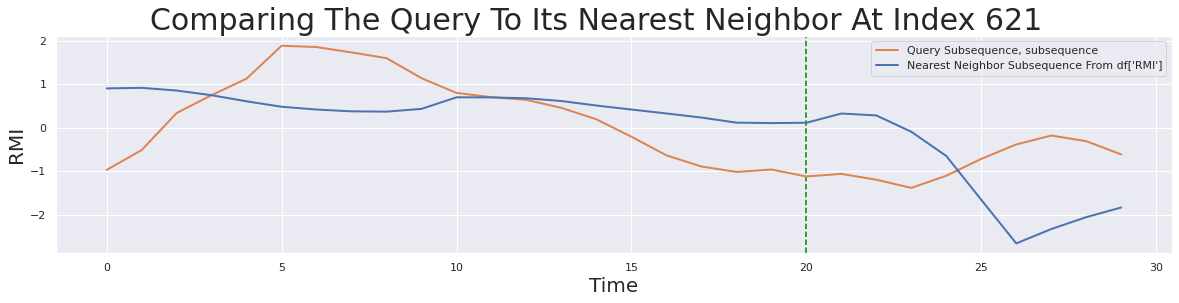

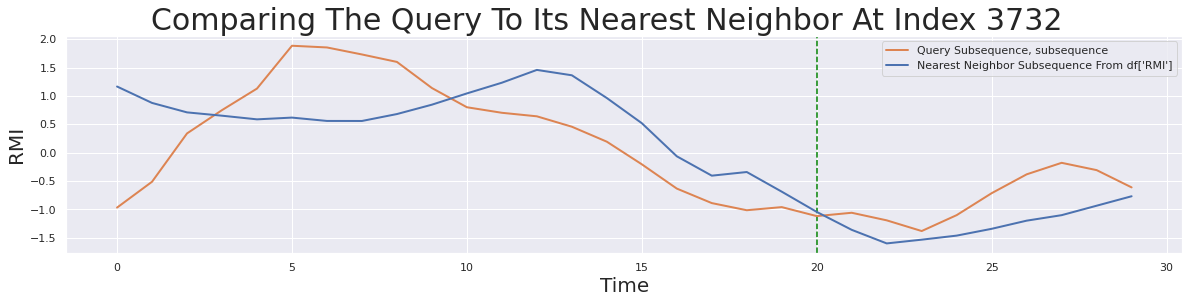

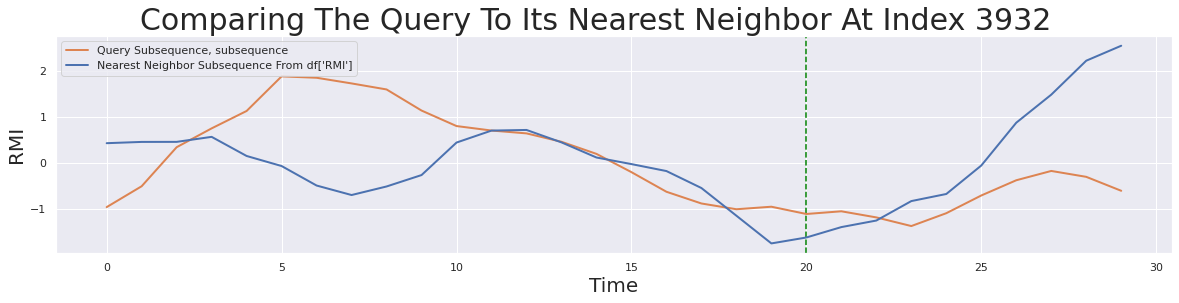

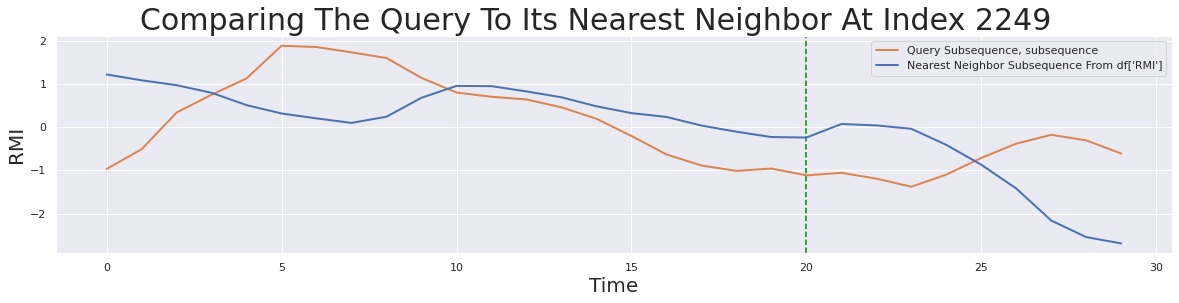

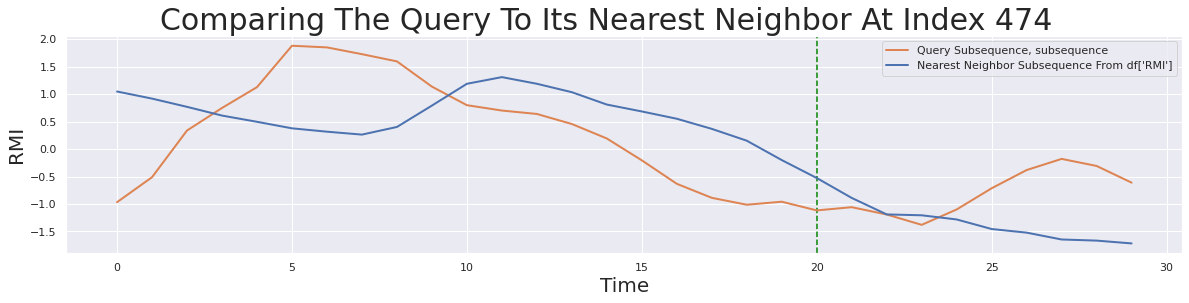

In [244]:
# set the prediction horizon here
prediction_horizon = 10
subsequence = df['RMI'][middle_index:middle_index+m+prediction_horizon]

for i in range(k):
    Q_z_norm = stumpy.core.z_norm(subsequence.values)
    T_z_norm = stumpy.core.z_norm(df['RMI'].values[idx[i]:idx[i]+m+prediction_horizon])
    
    plt.axvline(x=end_point, linestyle="dashed", color="green")

    plt.suptitle('Comparing The Query To Its Nearest Neighbor At Index {}'.format(idx[i]), fontsize='30')
    plt.xlabel('Time', fontsize ='20')
    plt.ylabel('RMI', fontsize='20')
    plt.plot(Q_z_norm, lw=2, color="C1", label="Query Subsequence, subsequence")
    plt.plot(T_z_norm, lw=2, label="Nearest Neighbor Subsequence From df['RMI']")
    plt.legend()
    plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


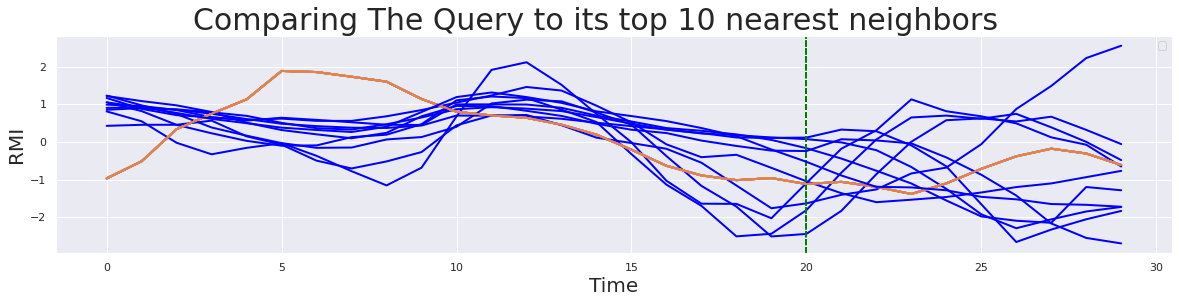

In [248]:
for i in range(k):
    Q_z_norm = stumpy.core.z_norm(subsequence.values)
    T_z_norm = stumpy.core.z_norm(df['RMI'].values[idx[i]:idx[i]+m+prediction_horizon])
    
    plt.axvline(x=end_point, linestyle="dashed", color="green")

    plt.suptitle('Comparing The Query to its top {} nearest neighbors'.format(k), fontsize='30')
    plt.xlabel('Time', fontsize ='20')
    plt.ylabel('RMI', fontsize='20')
    plt.plot(Q_z_norm, lw=2, color="C1")
    plt.plot(T_z_norm, lw=2, color='blue')
    plt.legend()
plt.show()